In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 
import operator
from pyomo import environ as pe
import os
os.environ['NEOS_EMAIL'] = 'XXXXXX@gmail.com' 

In [2]:
dic= {}
N = 11
itr=1
for x in range(1,N+1):
    for y in range(1,1+N):
        dic[itr,'x']=x
        dic[itr,'y']=y
        itr+=1
dic

{(1, 'x'): 1,
 (1, 'y'): 1,
 (2, 'x'): 1,
 (2, 'y'): 2,
 (3, 'x'): 1,
 (3, 'y'): 3,
 (4, 'x'): 1,
 (4, 'y'): 4,
 (5, 'x'): 1,
 (5, 'y'): 5,
 (6, 'x'): 1,
 (6, 'y'): 6,
 (7, 'x'): 1,
 (7, 'y'): 7,
 (8, 'x'): 1,
 (8, 'y'): 8,
 (9, 'x'): 1,
 (9, 'y'): 9,
 (10, 'x'): 1,
 (10, 'y'): 10,
 (11, 'x'): 1,
 (11, 'y'): 11,
 (12, 'x'): 2,
 (12, 'y'): 1,
 (13, 'x'): 2,
 (13, 'y'): 2,
 (14, 'x'): 2,
 (14, 'y'): 3,
 (15, 'x'): 2,
 (15, 'y'): 4,
 (16, 'x'): 2,
 (16, 'y'): 5,
 (17, 'x'): 2,
 (17, 'y'): 6,
 (18, 'x'): 2,
 (18, 'y'): 7,
 (19, 'x'): 2,
 (19, 'y'): 8,
 (20, 'x'): 2,
 (20, 'y'): 9,
 (21, 'x'): 2,
 (21, 'y'): 10,
 (22, 'x'): 2,
 (22, 'y'): 11,
 (23, 'x'): 3,
 (23, 'y'): 1,
 (24, 'x'): 3,
 (24, 'y'): 2,
 (25, 'x'): 3,
 (25, 'y'): 3,
 (26, 'x'): 3,
 (26, 'y'): 4,
 (27, 'x'): 3,
 (27, 'y'): 5,
 (28, 'x'): 3,
 (28, 'y'): 6,
 (29, 'x'): 3,
 (29, 'y'): 7,
 (30, 'x'): 3,
 (30, 'y'): 8,
 (31, 'x'): 3,
 (31, 'y'): 9,
 (32, 'x'): 3,
 (32, 'y'): 10,
 (33, 'x'): 3,
 (33, 'y'): 11,
 (34, 'x'): 4,
 (34, '

In [3]:
lines = {}
lcounter = 1
for x in range(1,N+1):
    lines[x]= []
    for n in range(1,1+N**2):
        for m in range(1,1+N**2):
            if n!=m and (dic[n,'x'] == dic[m,'x'] == x):
                lines[x].append(n)
                lines[x].append(m)

for y in range(1,N+1):
    lines[y+x]= []
    for n in range(1,1+N**2):
        for m in range(1,1+N**2):
            if n!=m and (dic[n,'y'] == dic[m,'y'] == y):
                lines[y+x].append(n)
                lines[y+x].append(m)

indx= y+x
for ramp in [1]:
    indx +=1 
    lines[indx]= []
    for n in range(1,1+N**2):
        for m in range(1,1+N**2):
            con1 = (dic[n,'y'] == dic[n,'x']) and (dic[m,'x'] == dic[m,'y'])
            if n!=m and (con1) :
                lines[indx].append(n)
                lines[indx].append(m)
                print((n,m) , dic[n,'x'] , dic[m,'x'], dic[n,'y'] , dic[m,'y'])
for ramp in [-1]:
    indx +=1 
    lines[indx]= []
    for n in range(1,1+N**2):
        for m in range(1,1+N**2):
            con2 = (dic[n,'y'] == N-dic[n,'x']+1) and (dic[m,'x'] == N-dic[m,'y']+1)
            if n!=m and (con2) :
                lines[indx].append(n)
                lines[indx].append(m)
                print((n,m) , dic[n,'x'] , dic[m,'x'], dic[n,'y'] , dic[m,'y'])
#lines[8]= [3 ,5,7]   

new_lines = {}

for l in lines:
    new_lines[l] = set(lines[l])
new_lines

(1, 13) 1 2 1 2
(1, 25) 1 3 1 3
(1, 37) 1 4 1 4
(1, 49) 1 5 1 5
(1, 61) 1 6 1 6
(1, 73) 1 7 1 7
(1, 85) 1 8 1 8
(1, 97) 1 9 1 9
(1, 109) 1 10 1 10
(1, 121) 1 11 1 11
(13, 1) 2 1 2 1
(13, 25) 2 3 2 3
(13, 37) 2 4 2 4
(13, 49) 2 5 2 5
(13, 61) 2 6 2 6
(13, 73) 2 7 2 7
(13, 85) 2 8 2 8
(13, 97) 2 9 2 9
(13, 109) 2 10 2 10
(13, 121) 2 11 2 11
(25, 1) 3 1 3 1
(25, 13) 3 2 3 2
(25, 37) 3 4 3 4
(25, 49) 3 5 3 5
(25, 61) 3 6 3 6
(25, 73) 3 7 3 7
(25, 85) 3 8 3 8
(25, 97) 3 9 3 9
(25, 109) 3 10 3 10
(25, 121) 3 11 3 11
(37, 1) 4 1 4 1
(37, 13) 4 2 4 2
(37, 25) 4 3 4 3
(37, 49) 4 5 4 5
(37, 61) 4 6 4 6
(37, 73) 4 7 4 7
(37, 85) 4 8 4 8
(37, 97) 4 9 4 9
(37, 109) 4 10 4 10
(37, 121) 4 11 4 11
(49, 1) 5 1 5 1
(49, 13) 5 2 5 2
(49, 25) 5 3 5 3
(49, 37) 5 4 5 4
(49, 61) 5 6 5 6
(49, 73) 5 7 5 7
(49, 85) 5 8 5 8
(49, 97) 5 9 5 9
(49, 109) 5 10 5 10
(49, 121) 5 11 5 11
(61, 1) 6 1 6 1
(61, 13) 6 2 6 2
(61, 25) 6 3 6 3
(61, 37) 6 4 6 4
(61, 49) 6 5 6 5
(61, 73) 6 7 6 7
(61, 85) 6 8 6 8
(61, 97) 6 9 6 9

{1: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11},
 2: {12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22},
 3: {23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
 4: {34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44},
 5: {45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55},
 6: {56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66},
 7: {67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77},
 8: {78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88},
 9: {89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99},
 10: {100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110},
 11: {111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121},
 12: {1, 12, 23, 34, 45, 56, 67, 78, 89, 100, 111},
 13: {2, 13, 24, 35, 46, 57, 68, 79, 90, 101, 112},
 14: {3, 14, 25, 36, 47, 58, 69, 80, 91, 102, 113},
 15: {4, 15, 26, 37, 48, 59, 70, 81, 92, 103, 114},
 16: {5, 16, 27, 38, 49, 60, 71, 82, 93, 104, 115},
 17: {6, 17, 28, 39, 50, 61, 72, 83, 94, 105, 116},
 18: {7, 18, 29, 40, 51, 62, 73, 84, 95, 106, 117},
 19: {8, 19, 30, 41, 52, 63, 74, 85, 96, 107, 118},
 20: {9, 20, 31, 42

In [4]:
n = N**2
model = AbstractModel()
model.N =Param(mutable=True, default=n) 
model.i = RangeSet(n)
model.j = Set(initialize=model.i)
model.l = RangeSet(len(new_lines))


model.W = Var(model.l, bounds=(0,1), initialize=0, within=Reals)
model.B = Var(model.l, bounds=(0,1), initialize=0, within=Reals)

model.x = Var(model.i, within=Binary)

def rule_C1(model,l,i):
    if i in new_lines[l]:
        return model.W[l] <= model.x[i]
    else:
        return Constraint.Skip 
model.C1   = Constraint(model.l,model.i,rule=rule_C1)


def rule_C1A(model,l):
    return model.W[l] >= sum( model.x[i] for i in model.i if i in new_lines[l]) - N+1
model.C1A   = Constraint(model.l,rule=rule_C1A)


def rule_C2(model):
    return sum(model.x[i] for i in model.i) == int(N**2/2)
model.C2   = Constraint(rule=rule_C2)


def rule_C3(model,l):
    return model.B[l] >= sum( 1-model.x[i] for i in model.i if i in new_lines[l]) - N+1
model.C3   = Constraint(model.l,rule=rule_C3)

def rule_C3A(model,l,i):
    if i in new_lines[l]:
        return model.B[l] <= 1-model.x[i]
    else:
        return Constraint.Skip 
model.C3A   = Constraint(model.l,model.i,rule=rule_C3A)

model.Cut   = ConstraintList()


def rule_OF(model):
    return sum(model.W[l]+model.B[l] for l in model.l)
model.obj1 = Objective(rule=rule_OF, sense=minimize)

from pyomo import environ as pe
solver_manager = pe.SolverManagerFactory('neos')

In [5]:
instance = model.create_instance()
# results = solver_manager.solve(instance, solver = "cplex")
results = solver_manager.solve(instance, solver='cplex', options={'mipgap':0.001})
print('OF= ',value(instance.obj1))


OF=  0.0


In [6]:
int(N**2/2)

60

OF=  0.0


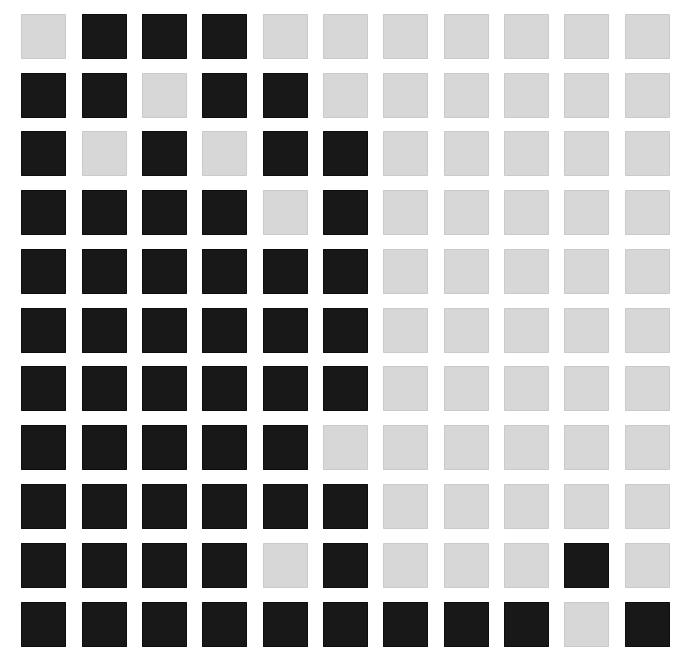

In [9]:
fig=plt.figure(figsize=(12,12))

for itr in range(1):
    expression = 0 
    for i in instance.i:
        if value(instance.x[i])>0:
            expression+=1-instance.x[i]
        else:
            expression+=instance.x[i]
    instance.Cut.add(expression>=1)
    results = solver_manager.solve(instance, solver='cplex', options={'mipgap':0.001})
    print('OF= ',value(instance.obj1))
    #plt.rc('axes',edgecolor='grey')
    #instance = model.create_instance()
    for i in instance.i:
        x,y = dic[i,'x'] , dic[i,'y'] 
        if value(instance.x[i])==0:
            plt.scatter( x,y,s=2000,marker='s',color='black',alpha=0.9)
        else:
            plt.scatter( x,y,s=2000,marker='s',color='grey',alpha=0.31)   
    plt.axis('off')
    plt.xlim(0.4,sqrt(n)+0.5)
    plt.ylim(0.4,sqrt(n)+0.5)
    plt.savefig('Board' + str(itr)+ '.png', format='png', dpi=300)
    if value(instance.obj1)>0:
        break